In [1]:
appid='app-20250624222224-0007'
basedir='s3a://gluten-profile/profile'
server="127.0.0.1"

In [2]:
import findspark
findspark.init()

In [3]:
import os
import time
import sys
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext

def get_py4jzip():
    spark_home=os.environ['SPARK_HOME']
    py4jzip = !ls {spark_home}/python/lib/py4j*.zip
    return py4jzip[0]

conf = (SparkConf()
    .set('spark.app.name', f'perf_analysis_{appid}')
    .set('spark.serializer','org.apache.spark.serializer.KryoSerializer')
    .set('spark.driver.memory','5g')
    .set('spark.executorEnv.PYTHONPATH',f"{os.environ['SPARK_HOME']}/python:{get_py4jzip()}:{':'.join(sys.path)}")
    .set('spark.sql.execution.arrow.pyspark.fallback.enabled','True')
    .set('spark.sql.execution.arrow.pyspark.enabled','True')
    .set('spark.sql.execution.arrow.maxRecordsPerBatch','100000')
    .set("spark.sql.legacy.timeParserPolicy","LEGACY")
       )

sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")
spark = SQLContext(sc)
time.sleep(10)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/25 05:04:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/opt/spark/python/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [24]:
%run /opt/spark/work-dir/ipython/sparklog.ipynb

In [25]:
appals=App_Log_Analysis(os.path.join(basedir,appid),None)

In [9]:
stats=appals.get_basic_state()

load data  s3a://gluten-profile/profile/app-20250624222224-0007


appid,app-20250624222224-0007
executor.instances,2
executor.cores,3
shuffle.partitions,12
batch size,"4,096"
real executors,2
Failed Tasks,
Speculative Tasks,0
Speculative Killed Tasks,0
Speculative Stage,0
runtime,100.32


In [11]:
appals.generate_trace_view('/opt/spark/work-dir/ipython/analysis/'+appid+'.json')

applog start time: 1750803785319


'http://127.0.0.1:1088/tracing_examples/trace_viewer.html#/tracing/test_data/app-20250624222224-0007.json'

In [12]:
cfg=appals.get_spark_config()
display(cfg)
cfg=cfg.fillna('')

,0
__fetch_continuous_blocks_in_batch_enabled,None
callSite.short,collect at /tmp/ipykernel_5618/3594056230.py:1
resource.executor.cores,None
spark.app.id,app-20250624222224-0007
spark.app.name,gluten_tpch_spark352
spark.app.startTime,1750803742523
spark.app.submitTime,1750803742414
spark.cleaner.periodicGC.interval,10s
spark.default.parallelism,56
spark.driver.extraClassPath,/opt/gluten/jars/gluten-velox-bundle.jar


,runtime,input read,disk spilled,memspilled,local_read,remote_read,shuffle_write,deser_time,run_time,ser_time,f_wait_time,gc_time,peak_mem,queryid,acc_task_time,stages,output rows,storage read,ram read,ssd read,executors,core/exec,task.cpus,parallelism
real_queryid,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,None,nan,nan,nan,nan,2,3,1,12
2,9.740000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380000,2.900000,0.000000,0.000000,0.010000,0.500000,3.000000,6.700000,[0 2 4 7],0.120000,0.380000,0.000000,0.000000,2,3,1,12
3,4.380000,0.100000,0.000000,0.000000,0.060000,0.060000,0.120000,0.100000,1.670000,0.010000,0.000000,0.020000,0.600000,6.000000,3.820000,[ 8 9 10 11 12 13 14 16 17 19 21 22 24 27 30 31],0.110000,0.100000,0.000000,0.000000,2,3,1,12
4,5.440000,0.430000,0.000000,0.000000,0.190000,0.190000,0.380000,0.040000,2.290000,0.010000,0.040000,0.030000,0.600000,9.000000,4.850000,[32 33 34 37 38],0.180000,0.430000,0.000000,0.000000,2,3,1,12
5,3.840000,0.260000,0.000000,0.000000,0.080000,0.080000,0.160000,0.030000,1.460000,0.010000,0.000000,0.020000,1.160000,12.000000,3.100000,[39 40 43 47 51 56],0.190000,0.260000,0.000000,0.000000,2,3,1,12
6,6.190000,0.510000,0.000000,0.000000,0.480000,0.480000,0.960000,0.050000,2.640000,0.000000,0.070000,0.020000,0.910000,15.000000,5.530000,[57 58 59 60 61 62 65 67 68 73 79],0.350000,0.510000,0.000000,0.000000,2,3,1,12
7,1.410000,0.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.550000,0.000000,0.000000,0.000000,0.400000,18.000000,1.170000,[80 82],0.000000,0.340000,0.000000,0.000000,2,3,1,12
8,4.210000,0.570000,0.000000,0.000000,0.080000,0.080000,0.160000,0.050000,1.510000,0.000000,0.000000,0.010000,0.650000,21.000000,3.280000,[ 83 84 85 87 88 89 91 92 95 99 103 108],0.090000,0.580000,0.000000,0.000000,2,3,1,12
9,4.980000,0.700000,0.000000,0.000000,0.040000,0.030000,0.070000,0.040000,1.890000,0.010000,0.000000,0.020000,0.860000,24.000000,4.010000,[109 110 111 112 113 114 115 116 118 119 122 126 128 131 134 138],0.040000,0.710000,0.000000,0.000000,2,3,1,12


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
AQEShuffleRead,0,2,4,0,2,1,0,3,4,2,2,0,4,2,0,2,2,2,3,2,5,1,2
AdaptiveSparkPlan,0,1,3,1,1,3,1,5,3,1,1,1,1,1,1,1,1,3,1,1,3,3,3
BroadcastHashJoinExecTransformer,0,0,8,1,0,3,0,4,6,3,2,0,1,0,0,2,1,2,2,1,5,2,0
BroadcastQueryStage,0,0,8,1,0,3,0,4,6,3,2,0,1,0,0,2,1,2,2,1,5,2,0
ColumnarBroadcastExchange,0,0,8,1,0,3,0,4,6,3,2,0,1,0,0,2,1,2,2,1,5,2,0
ColumnarExchange,0,2,7,2,4,7,1,9,8,6,4,0,4,4,3,4,5,5,7,3,7,7,6
FilterExecTransformer,0,1,12,3,2,8,1,10,10,6,4,0,2,1,2,4,3,6,5,2,9,7,3
FlushableHashAggregateExecTransformer,0,1,3,0,1,3,1,5,3,1,0,0,1,1,1,0,2,4,2,1,3,3,3
InputAdapter,0,2,13,3,4,10,1,12,13,9,5,0,4,4,3,5,6,7,7,3,10,9,6
InputIteratorTransformer,0,2,13,3,4,10,1,12,13,9,5,0,4,4,3,5,6,7,7,3,10,9,6


,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23
ColumnarExchange,0.000000,10.820000,33.790000,38.500000,66.050000,0.000000,16.580000,6.580000,29.520000,18.030000,15.310000,16.340000,2.750000,18.030000,9.840000,0.090000,196.460000,1.280000,0.240000,143.190000,15.190000
VeloxResizeBatches,0.000000,10.820000,33.790000,38.500000,66.050000,0.000000,16.580000,6.580000,29.520000,18.030000,15.310000,16.340000,2.750000,18.030000,9.870000,0.090000,196.460000,1.280000,0.240000,143.190000,15.190000


,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23
BroadcastHashJoinExecTransformer,0.000000,17.630000,1.460000,0.000000,0.500000,0.000000,1.760000,0.980000,9.780000,2.300000,0.310000,0.000000,0.000000,2.300000,8.000000,0.070000,0.000000,0.000000,0.250000,0.120000,0.000000
ColumnarExchange,0.000000,10.820000,33.790000,38.500000,66.050000,0.000000,16.580000,6.580000,29.520000,18.030000,15.310000,16.340000,2.750000,18.030000,10.160000,0.090000,316.430000,1.280000,0.240000,143.190000,15.190000
FilterExecTransformer,0.000000,1.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000
FlushableHashAggregateExecTransformer,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.510000,0.030000,119.970000,0.000000,0.090000,0.030000,0.000000
InputIteratorTransformer,0.000000,10.780000,33.790000,38.500000,66.050000,0.000000,16.460000,6.460000,29.520000,17.460000,15.000000,16.340000,2.750000,17.460000,10.160000,0.090000,196.470000,1.280000,0.090000,143.190000,15.190000
ProjectExecTransformer,59.140000,37.800000,41.790000,39.030000,75.750000,1.140000,19.810000,7.670000,99.500000,20.710000,15.620000,33.180000,3.500000,20.710000,11.000000,0.220000,316.430000,1.280000,0.540000,145.370000,16.010000
RegularHashAggregateExecTransformer,0.000000,1.180000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380000,0.000000,1.500000,0.000000,0.380000,1.250000,0.000000,30.000000,0.000000,0.060000,0.000000,0.000000
ScanTransformer parquet spark_catalog.tpch_sf10_parquet_zstd.table_customer,0.000000,0.000000,0.300000,0.000000,1.500000,0.000000,0.120000,1.500000,0.000000,1.500000,0.000000,1.500000,0.000000,1.500000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.950000
ScanTransformer parquet spark_catalog.tpch_sf10_parquet_zstd.table_lineitem,59.140000,0.000000,32.330000,37.930000,59.990000,1.140000,1.460000,0.400000,59.990000,14.810000,0.310000,0.000000,0.750000,14.810000,0.000000,0.120000,179.960000,1.280000,0.100000,135.850000,0.000000
ScanTransformer parquet spark_catalog.tpch_sf10_parquet_zstd.table_nation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


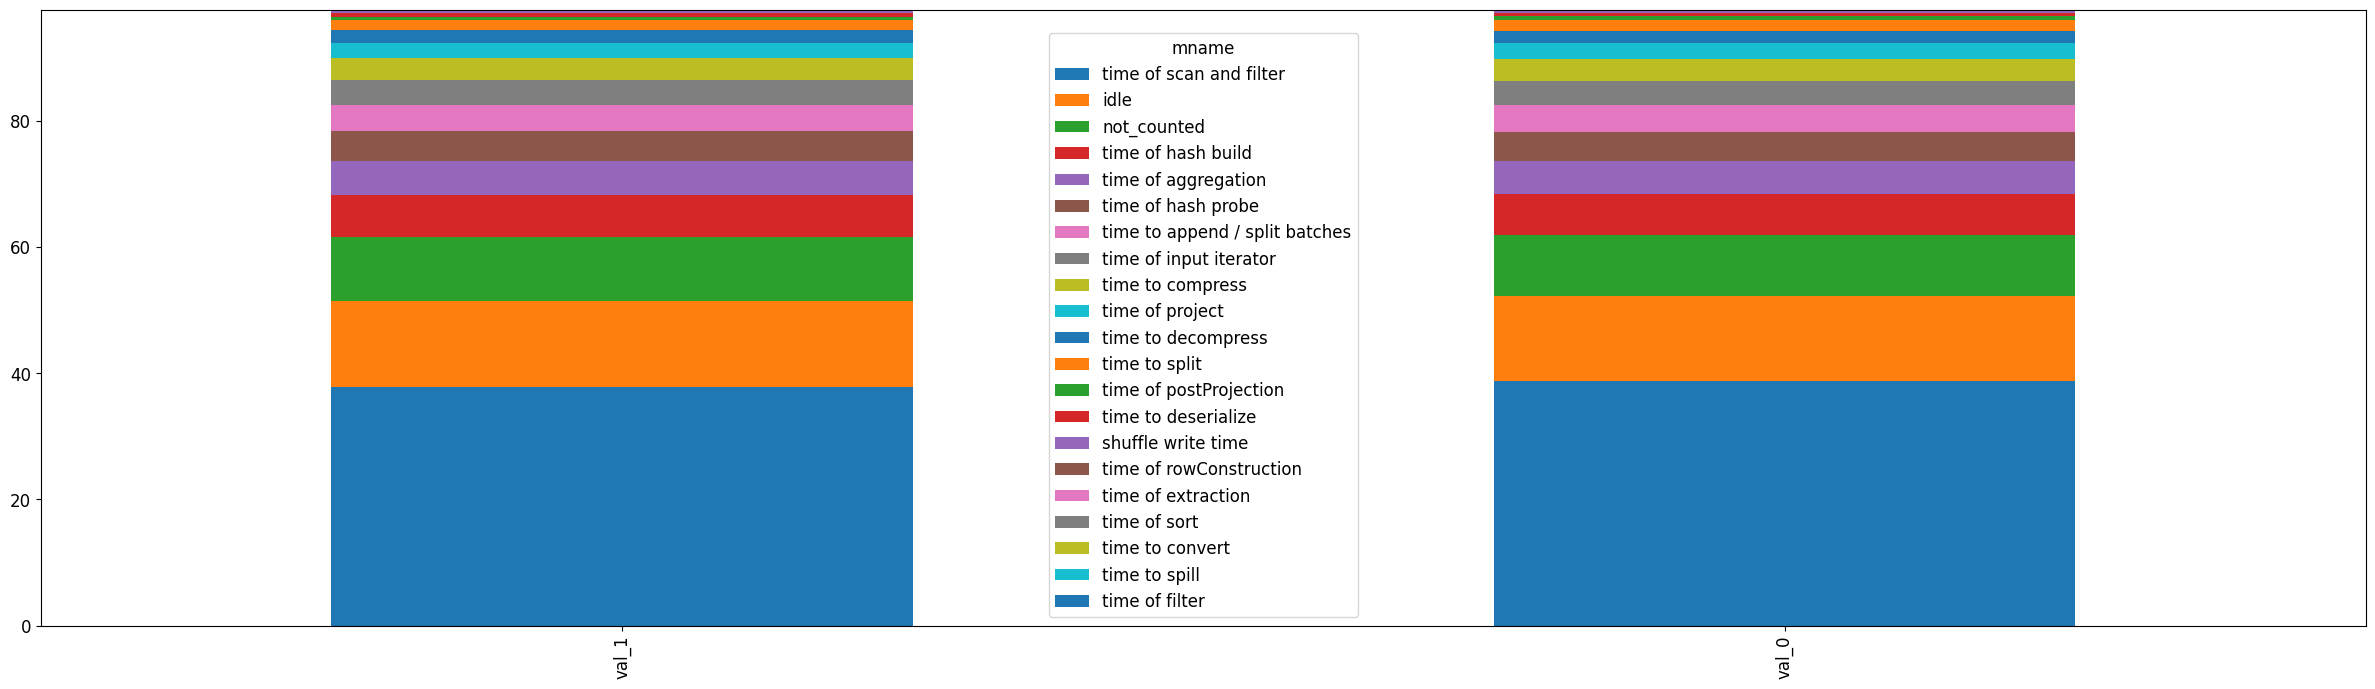

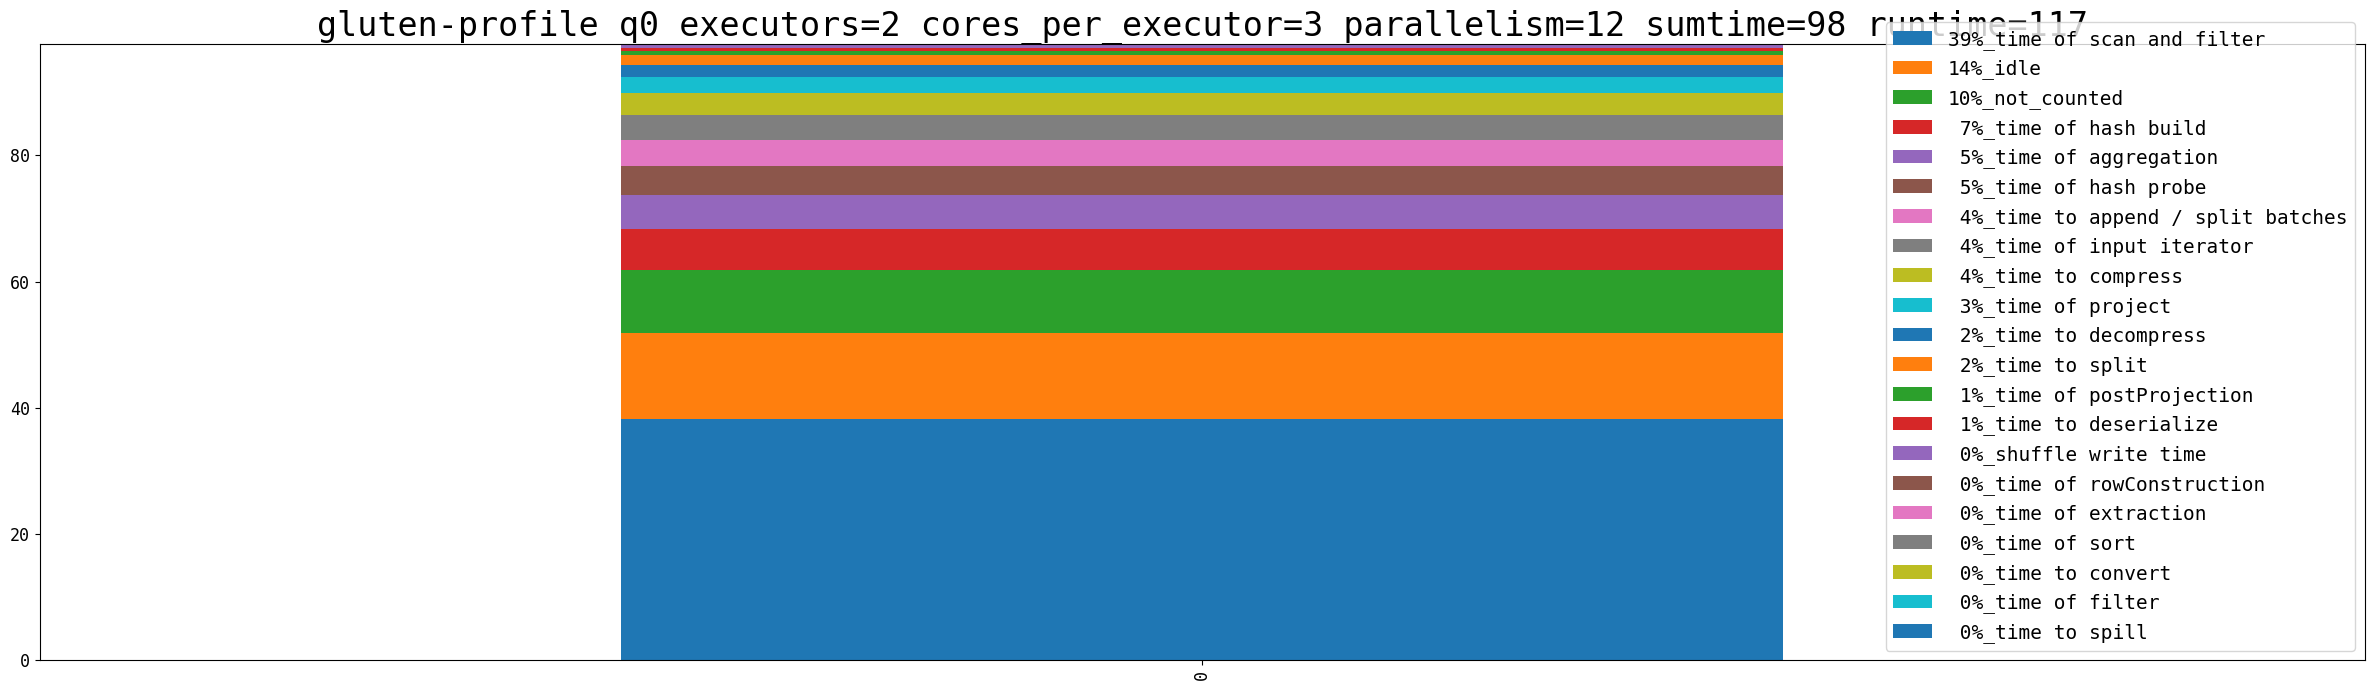

In [13]:
appals.get_app_info()

,0
42%_time of scan and filter,40.922688039
12%_not_counted,12.141897558000004
7%_time of hash build,6.987313724000001
6%_time of aggregation,5.601568908000001
5%_time of hash probe,5.265572669
5%_time to append / split batches,4.699
5%_idle,4.678
5%_time of input iterator,4.517821639999998
4%_time to compress,4.059619839
3%_time of project,2.7378027850000004


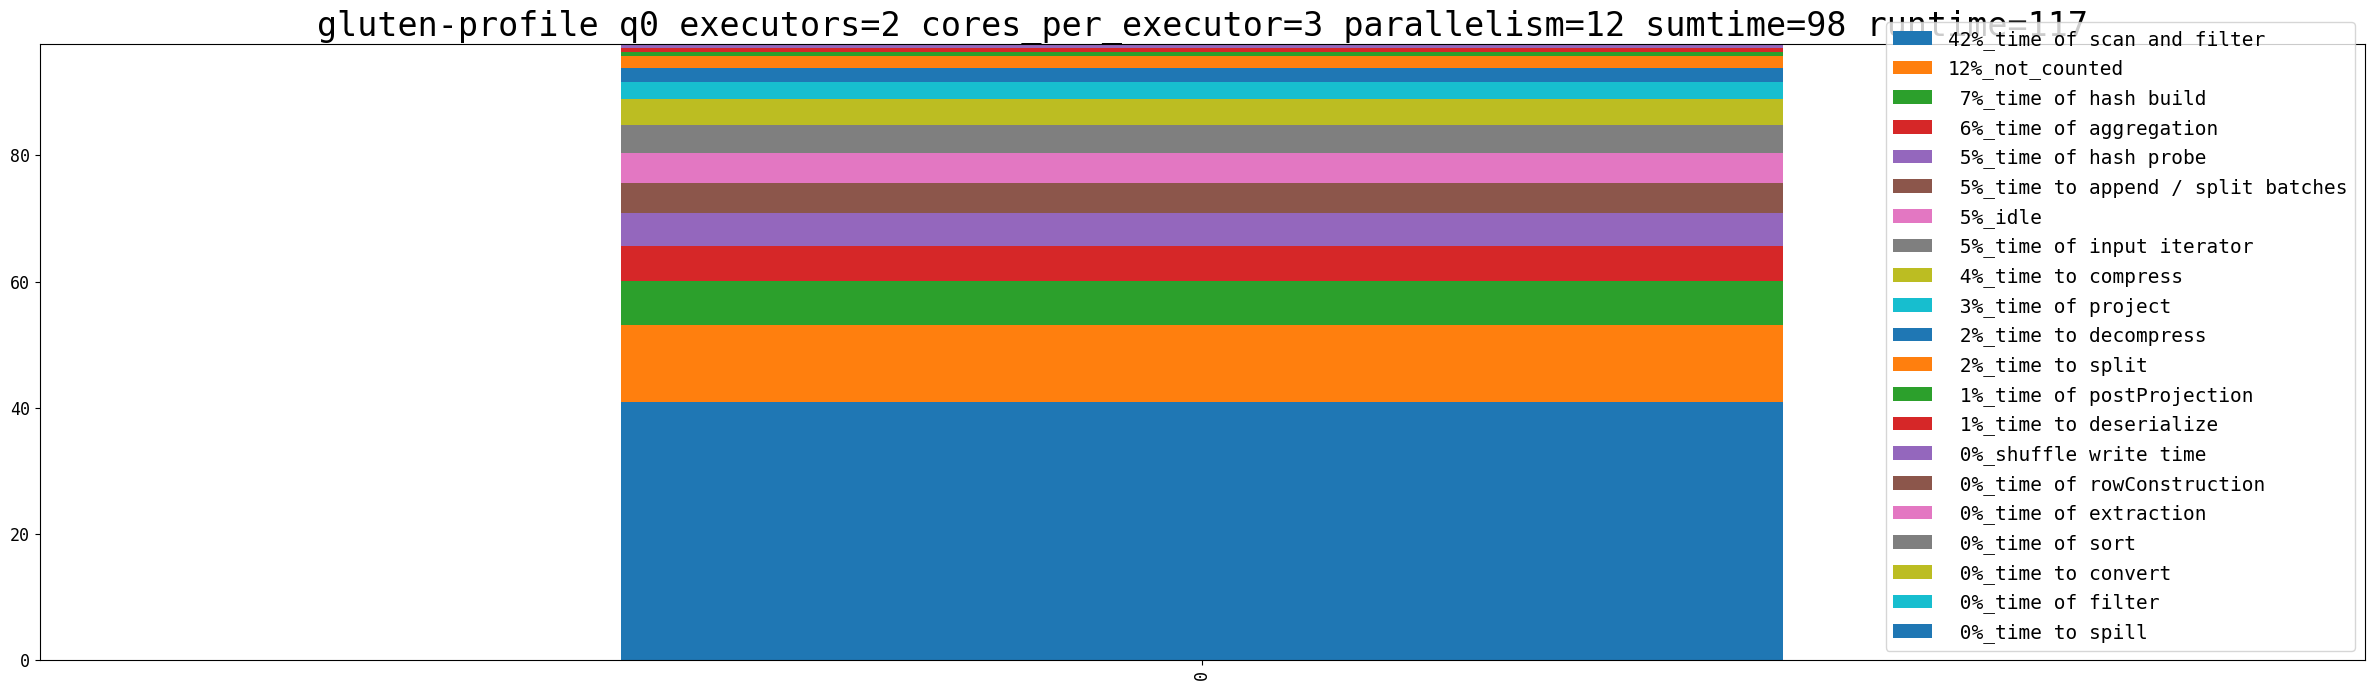

In [14]:
breakdown=appals.show_critical_path_time_breakdown(plot=False).T
display(breakdown)

In [26]:
out=appals.get_query_plan(queryid=3)

load data  s3a://gluten-profile/profile/app-20250624222224-0007


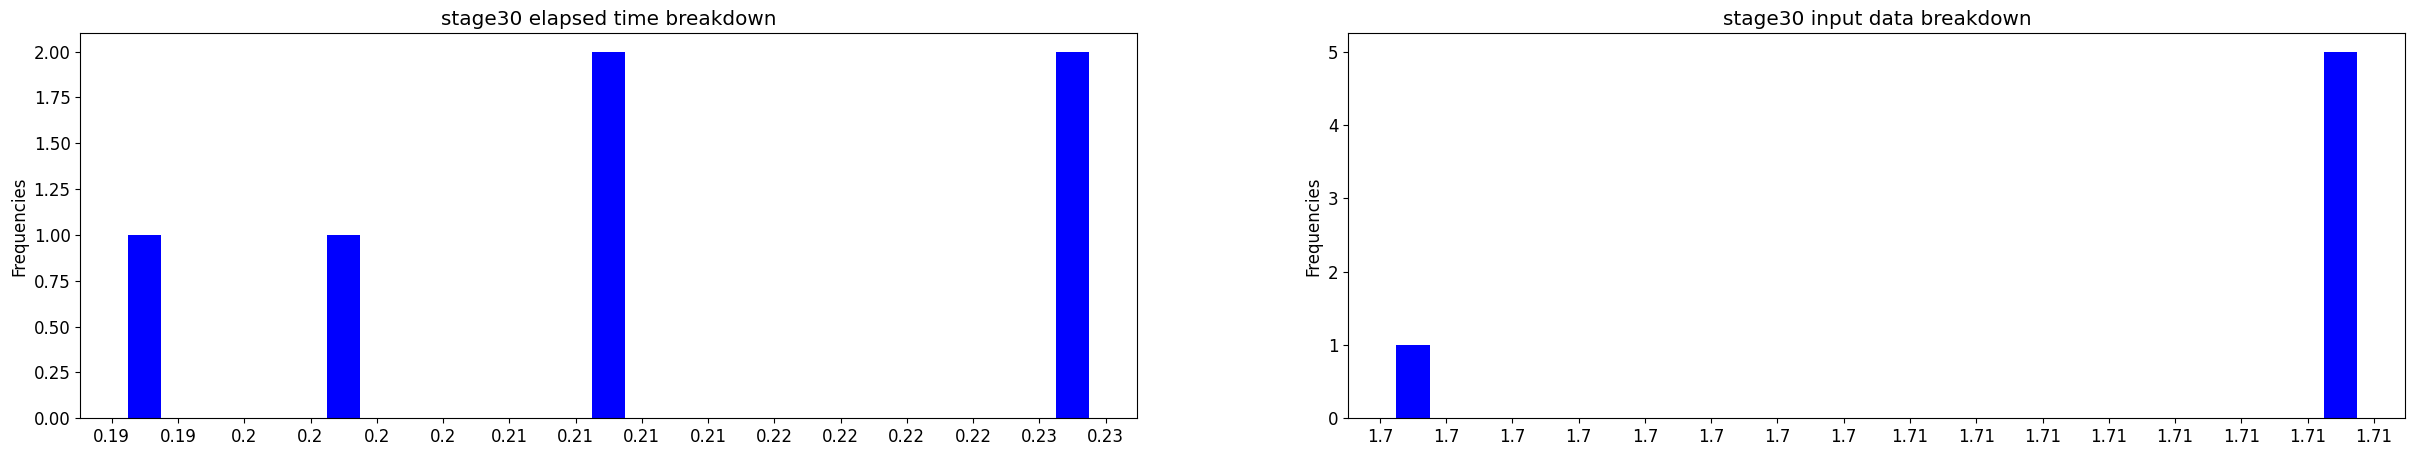

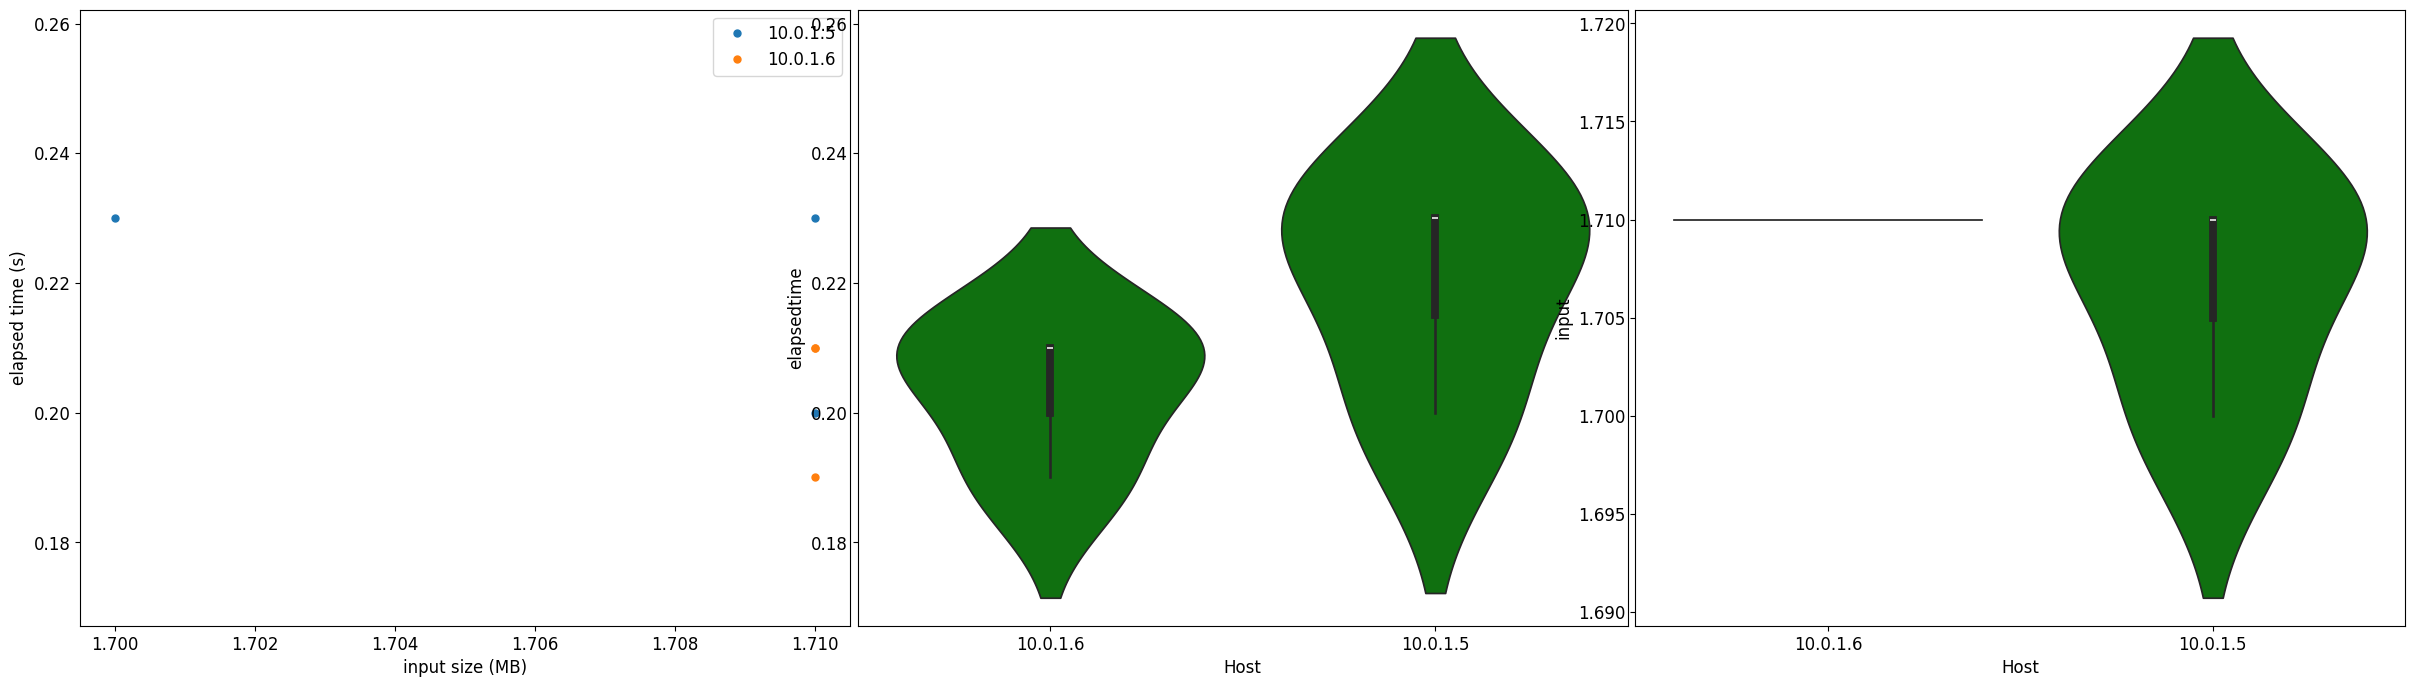

In [27]:
appals.show_Stage_histogram(30,15)

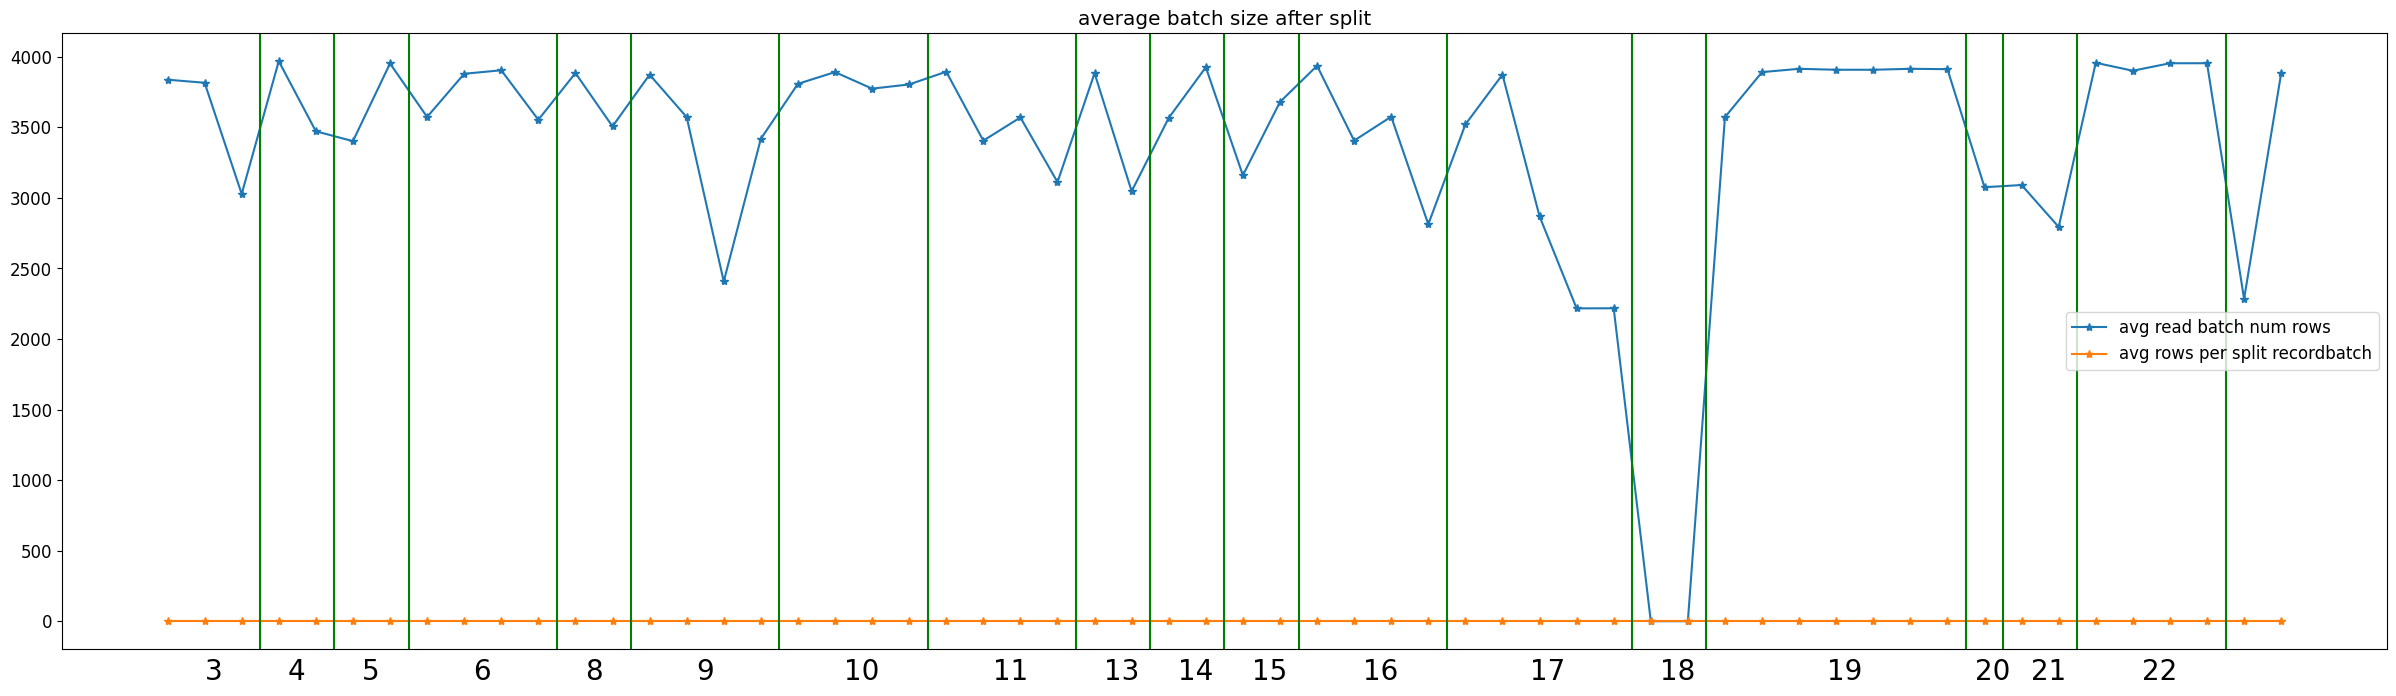

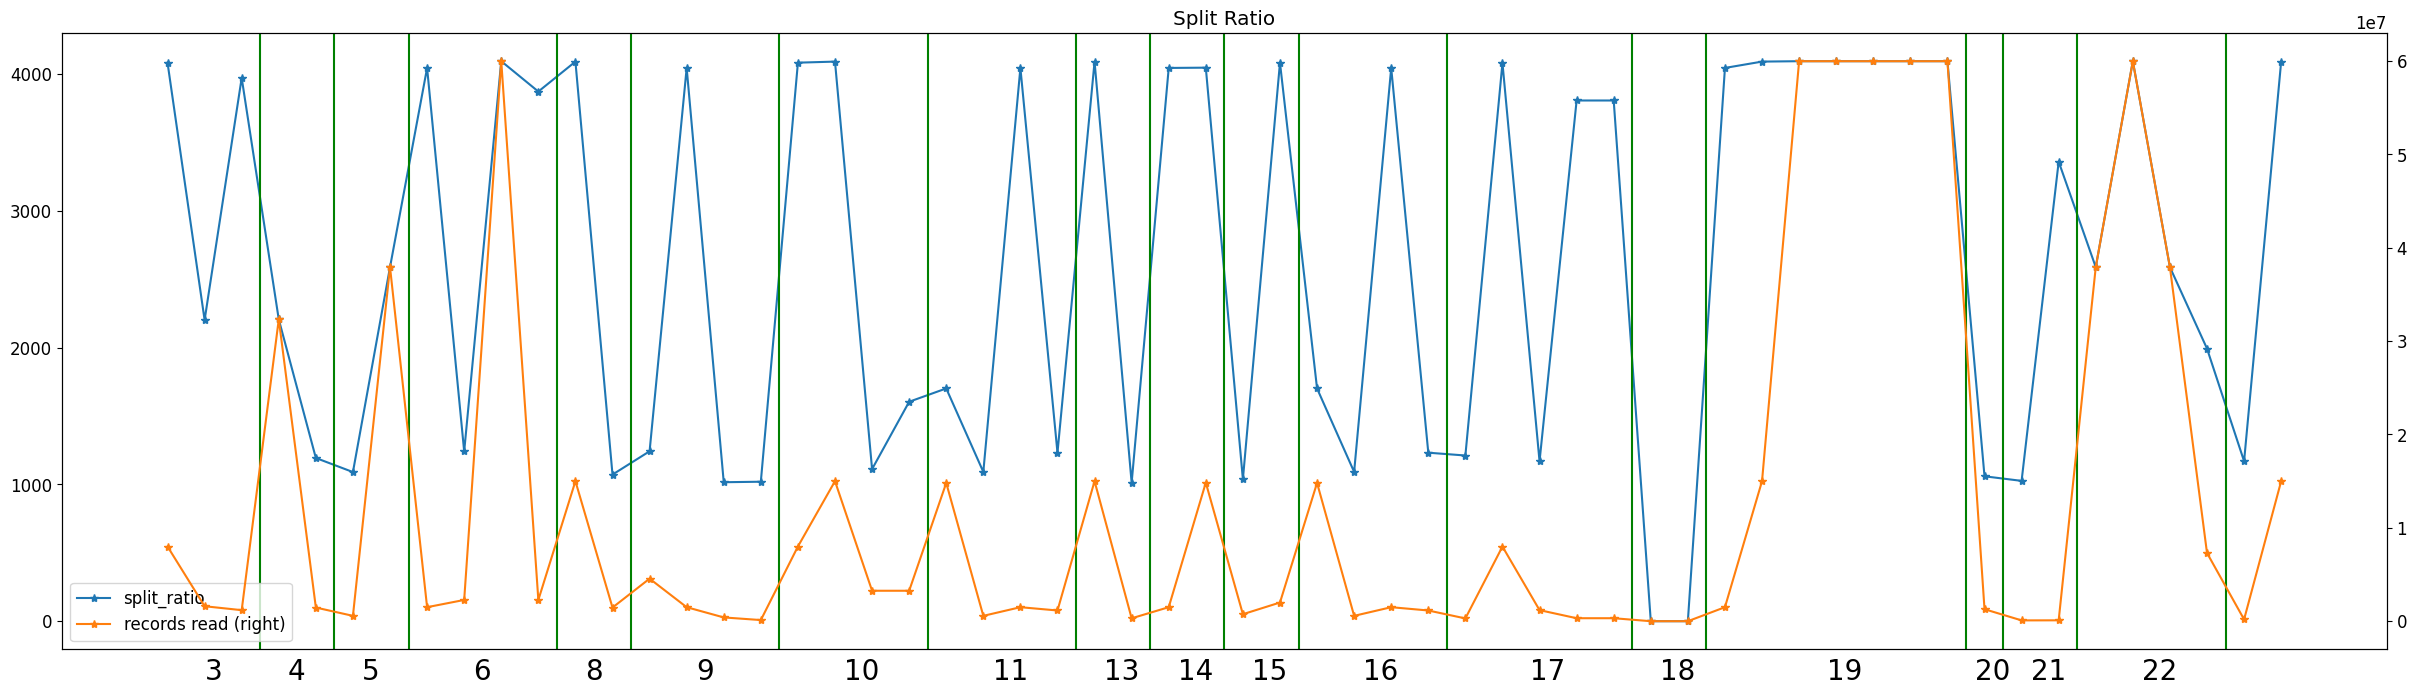

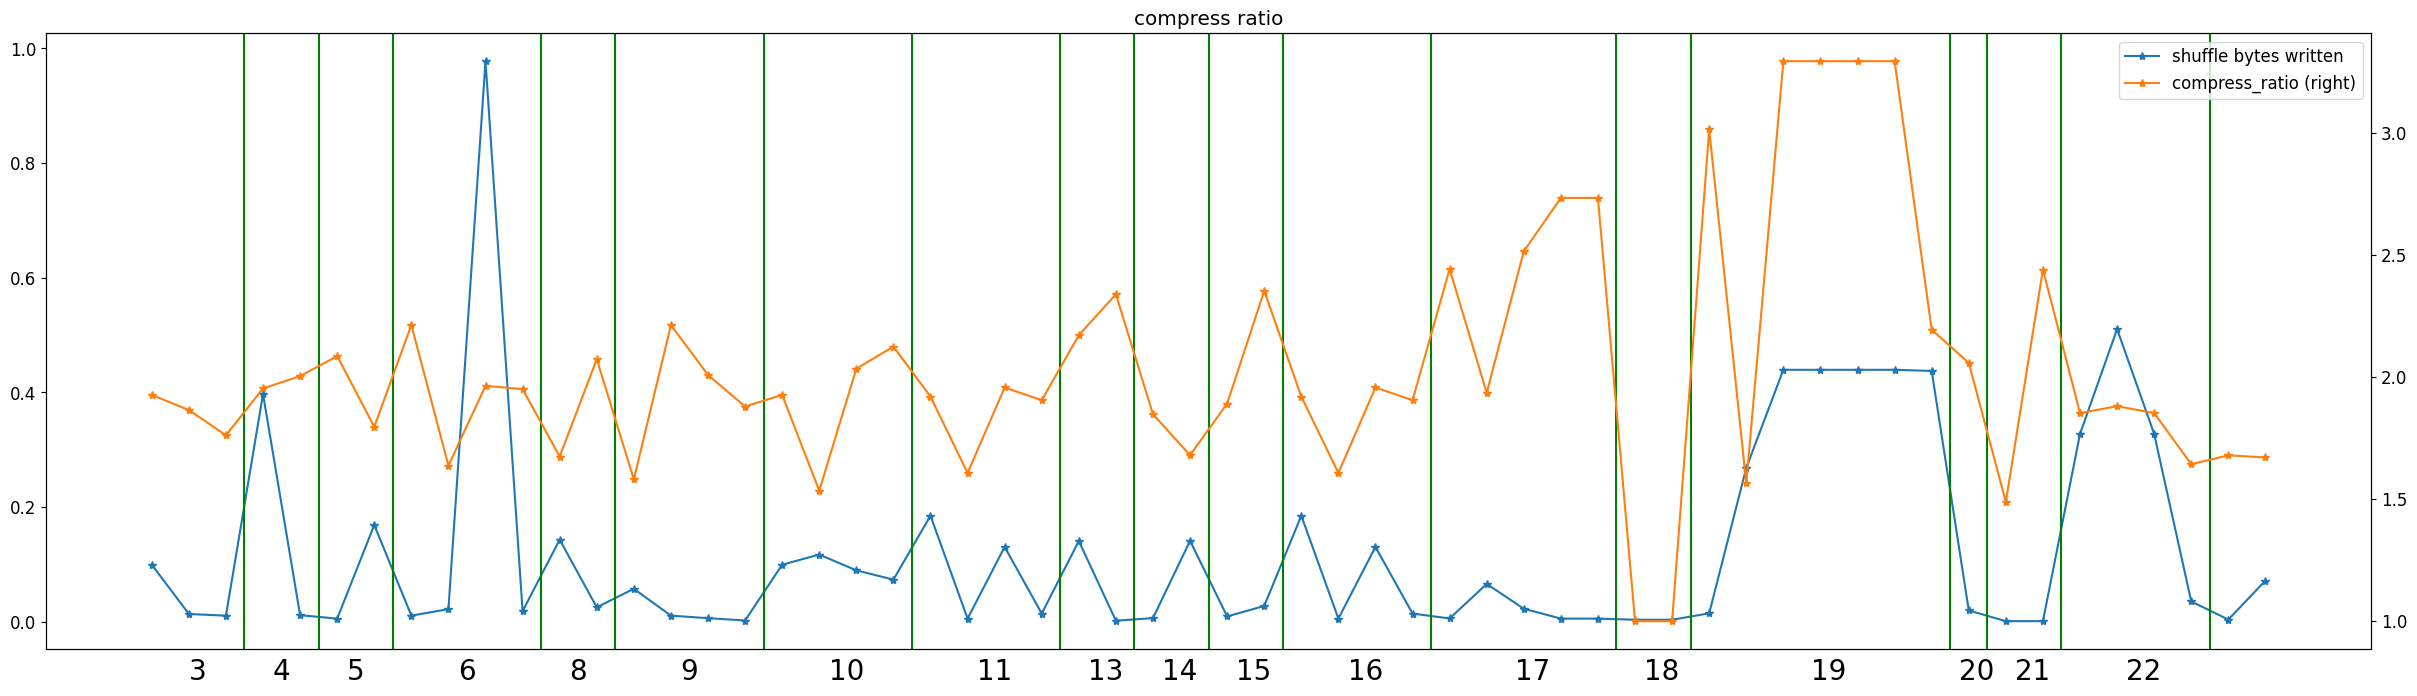

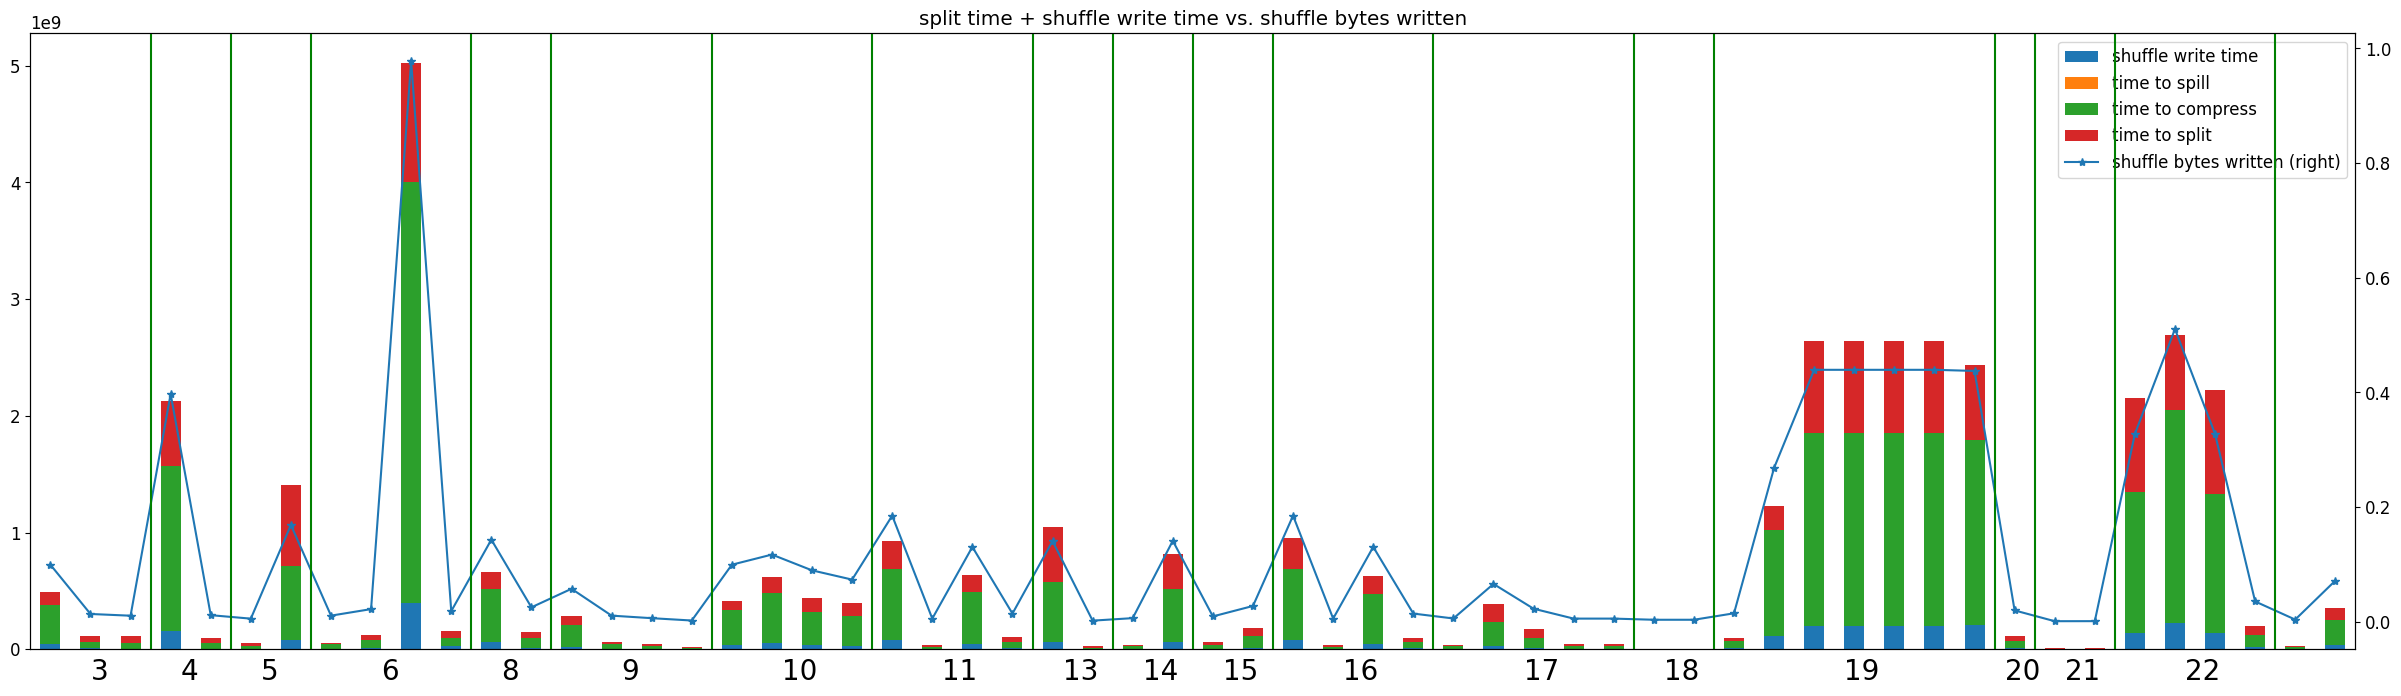

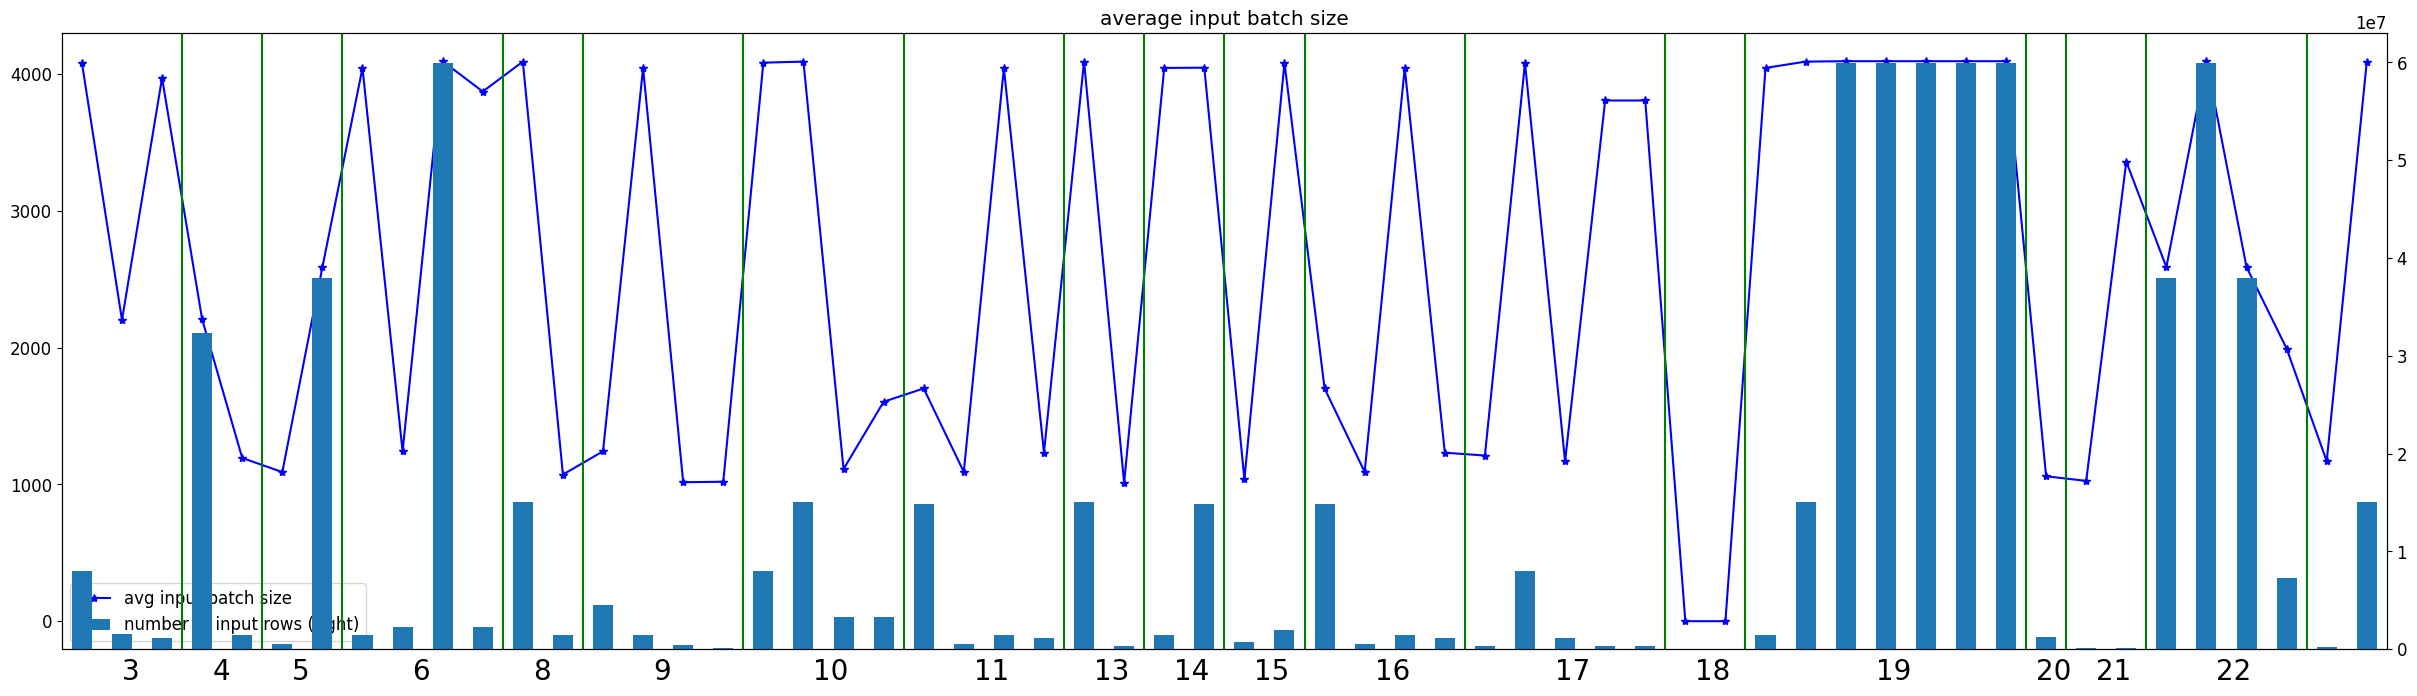

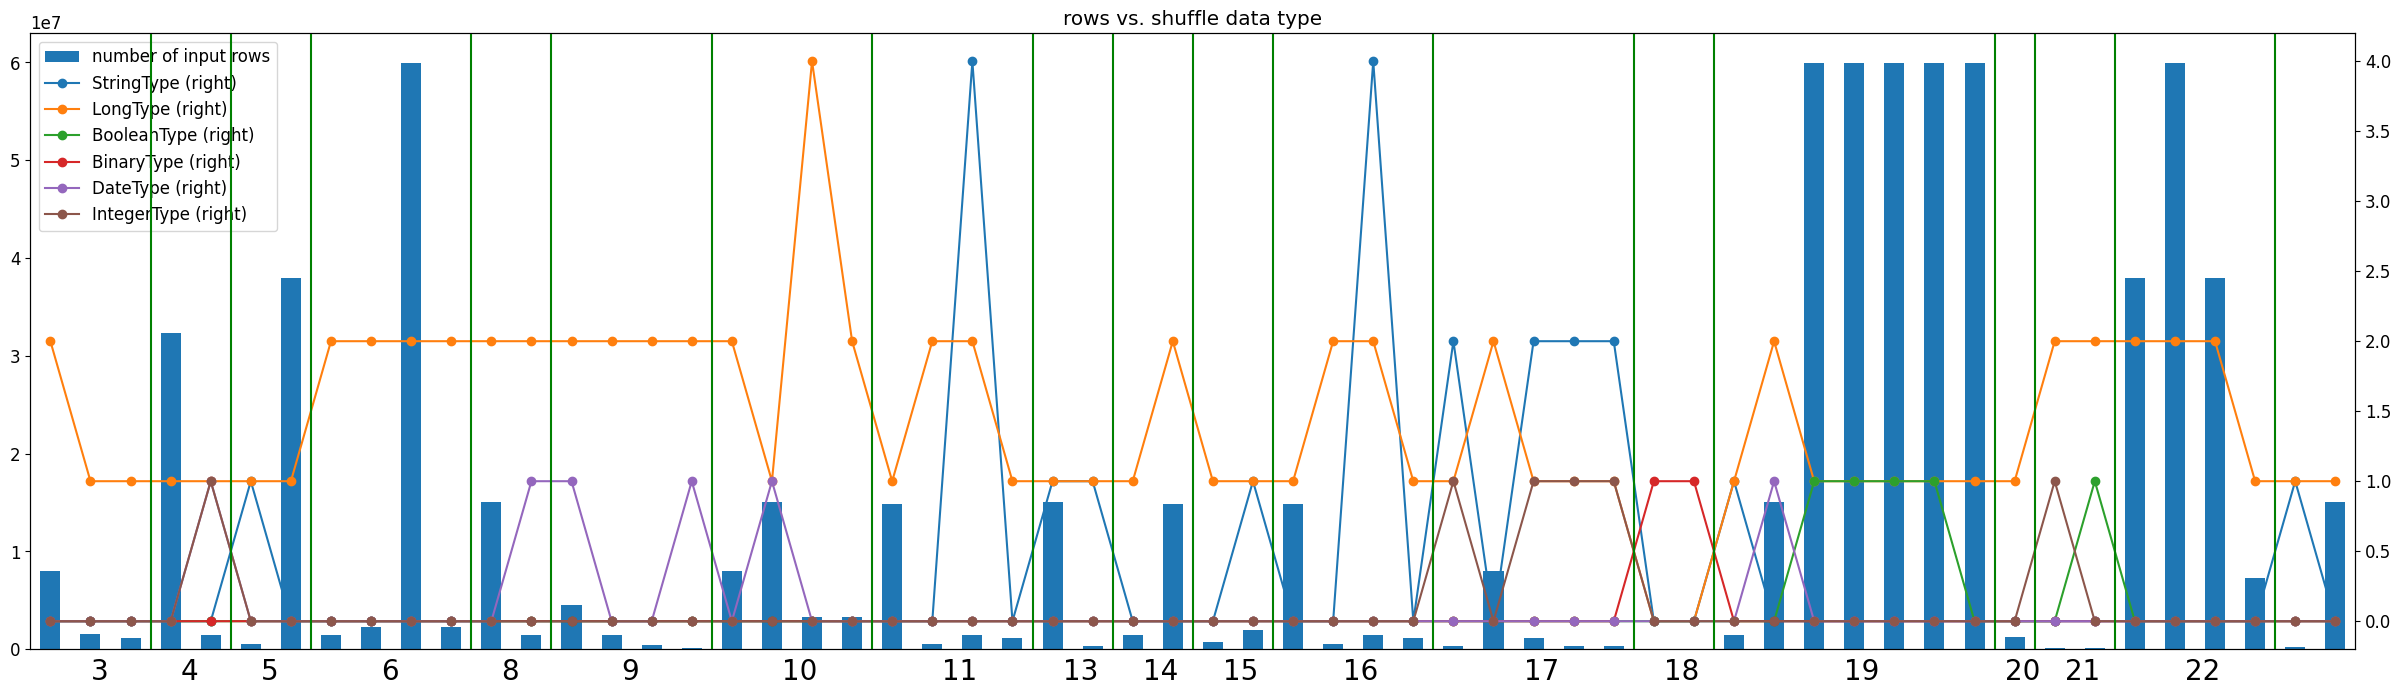

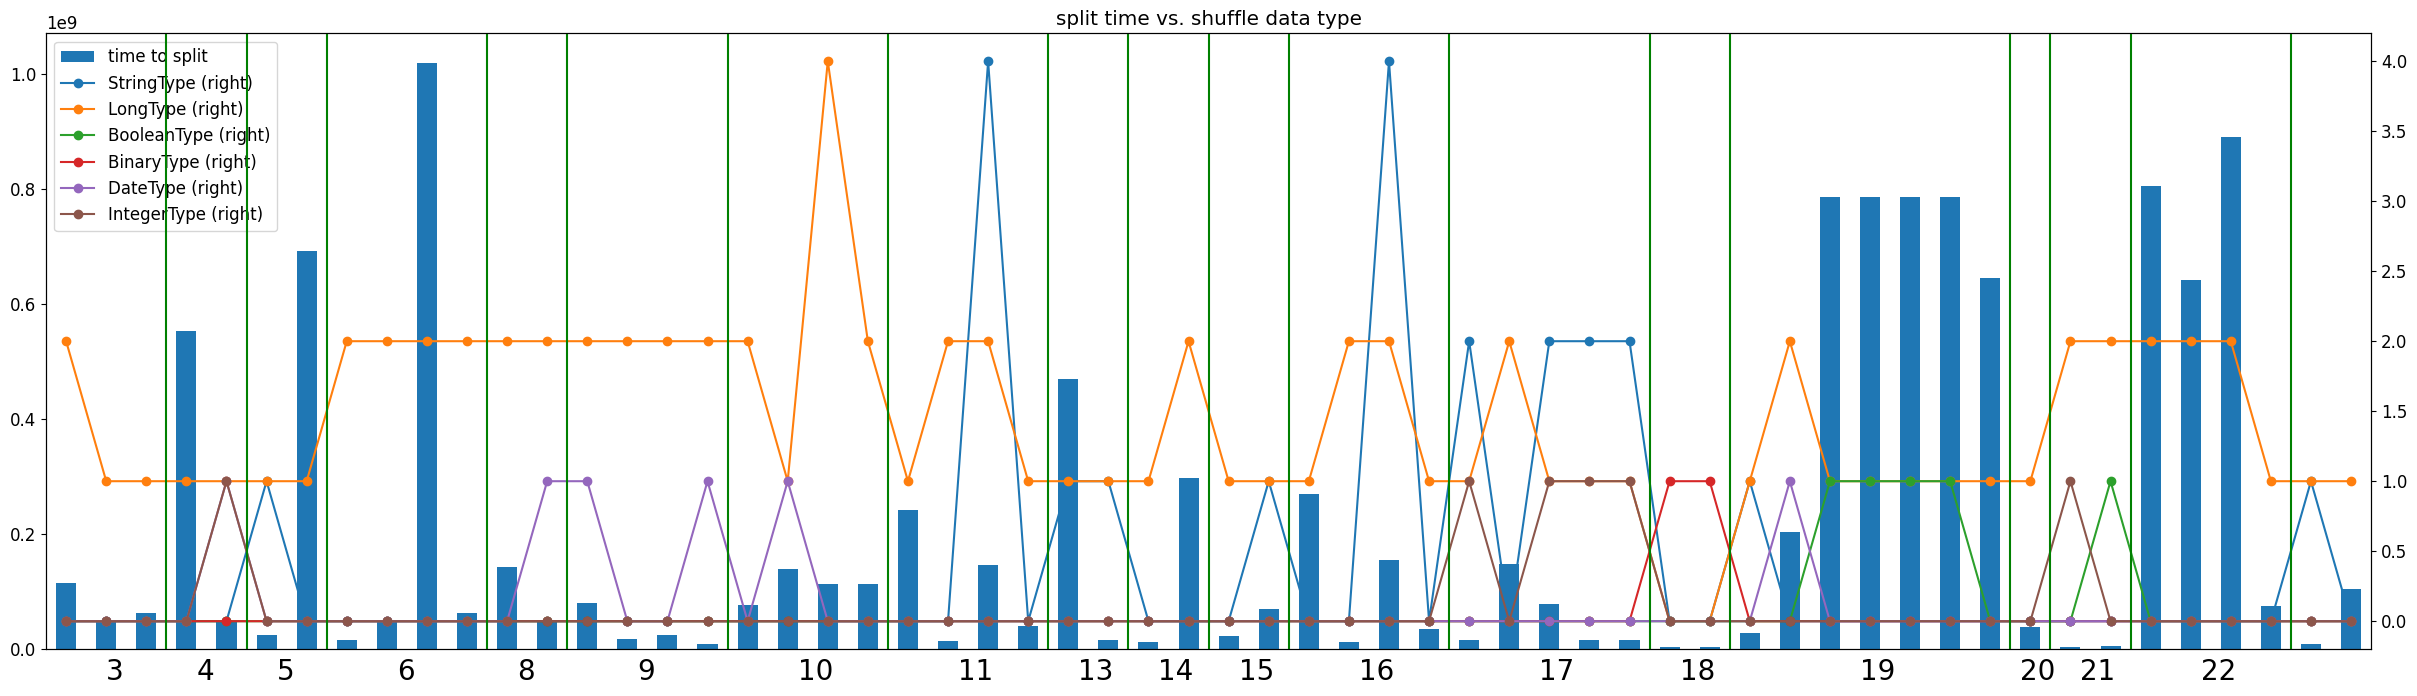

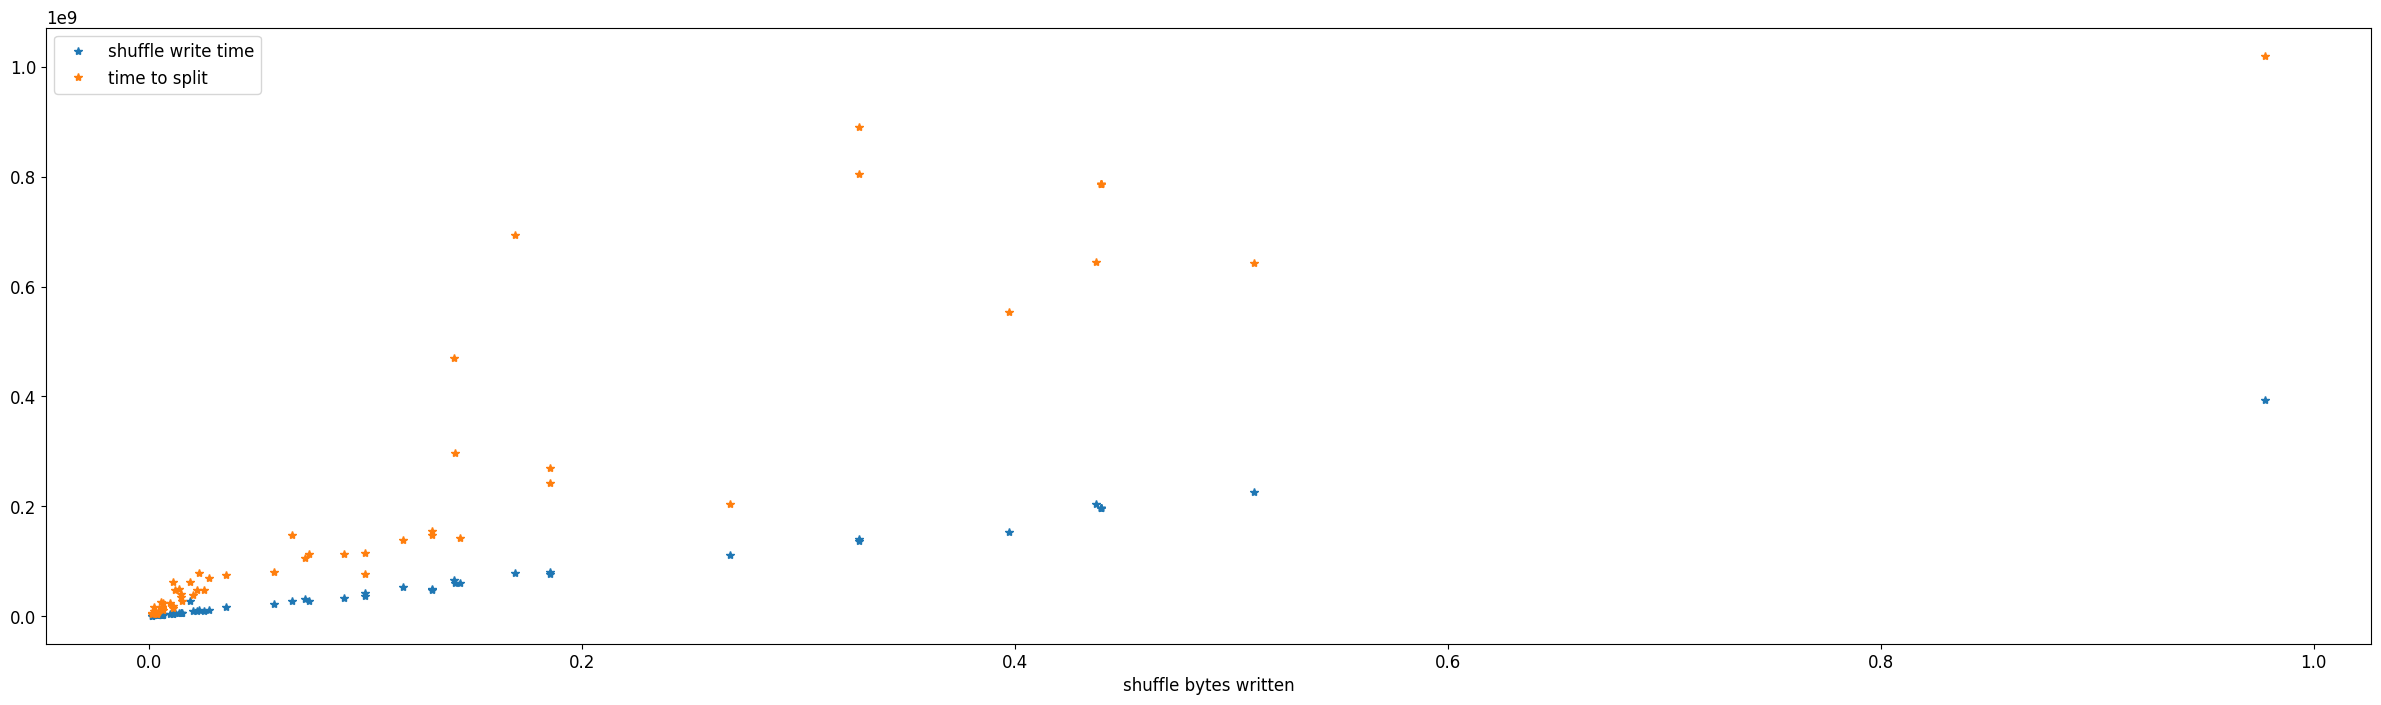

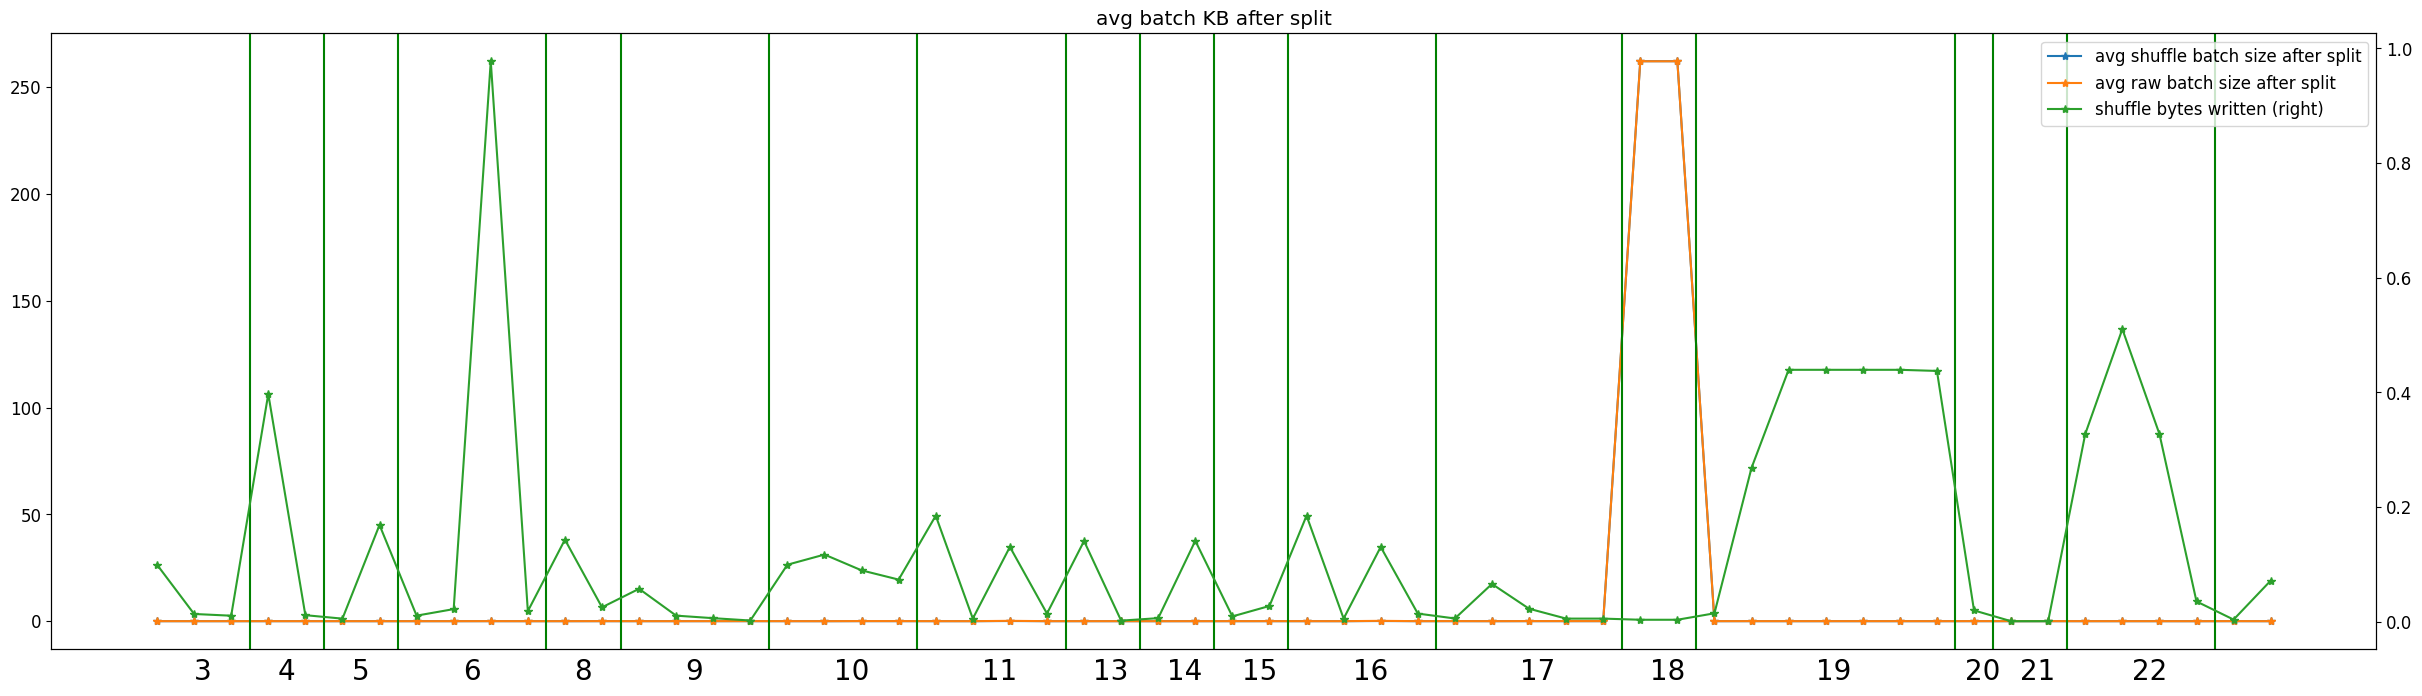

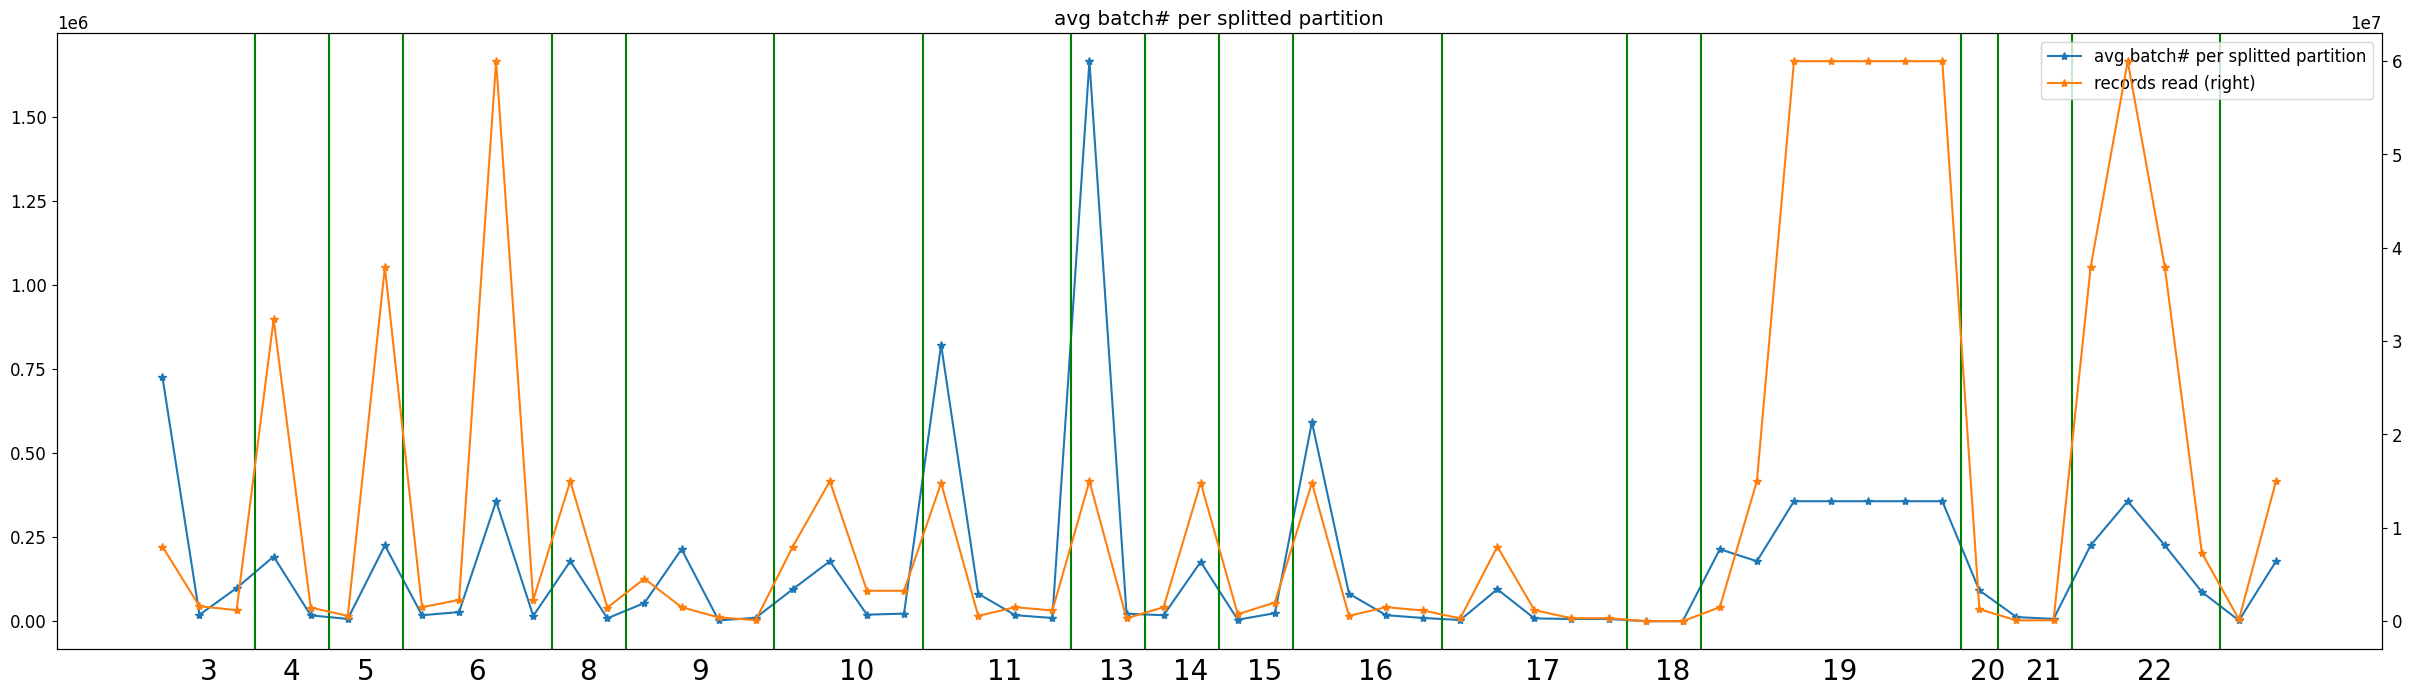

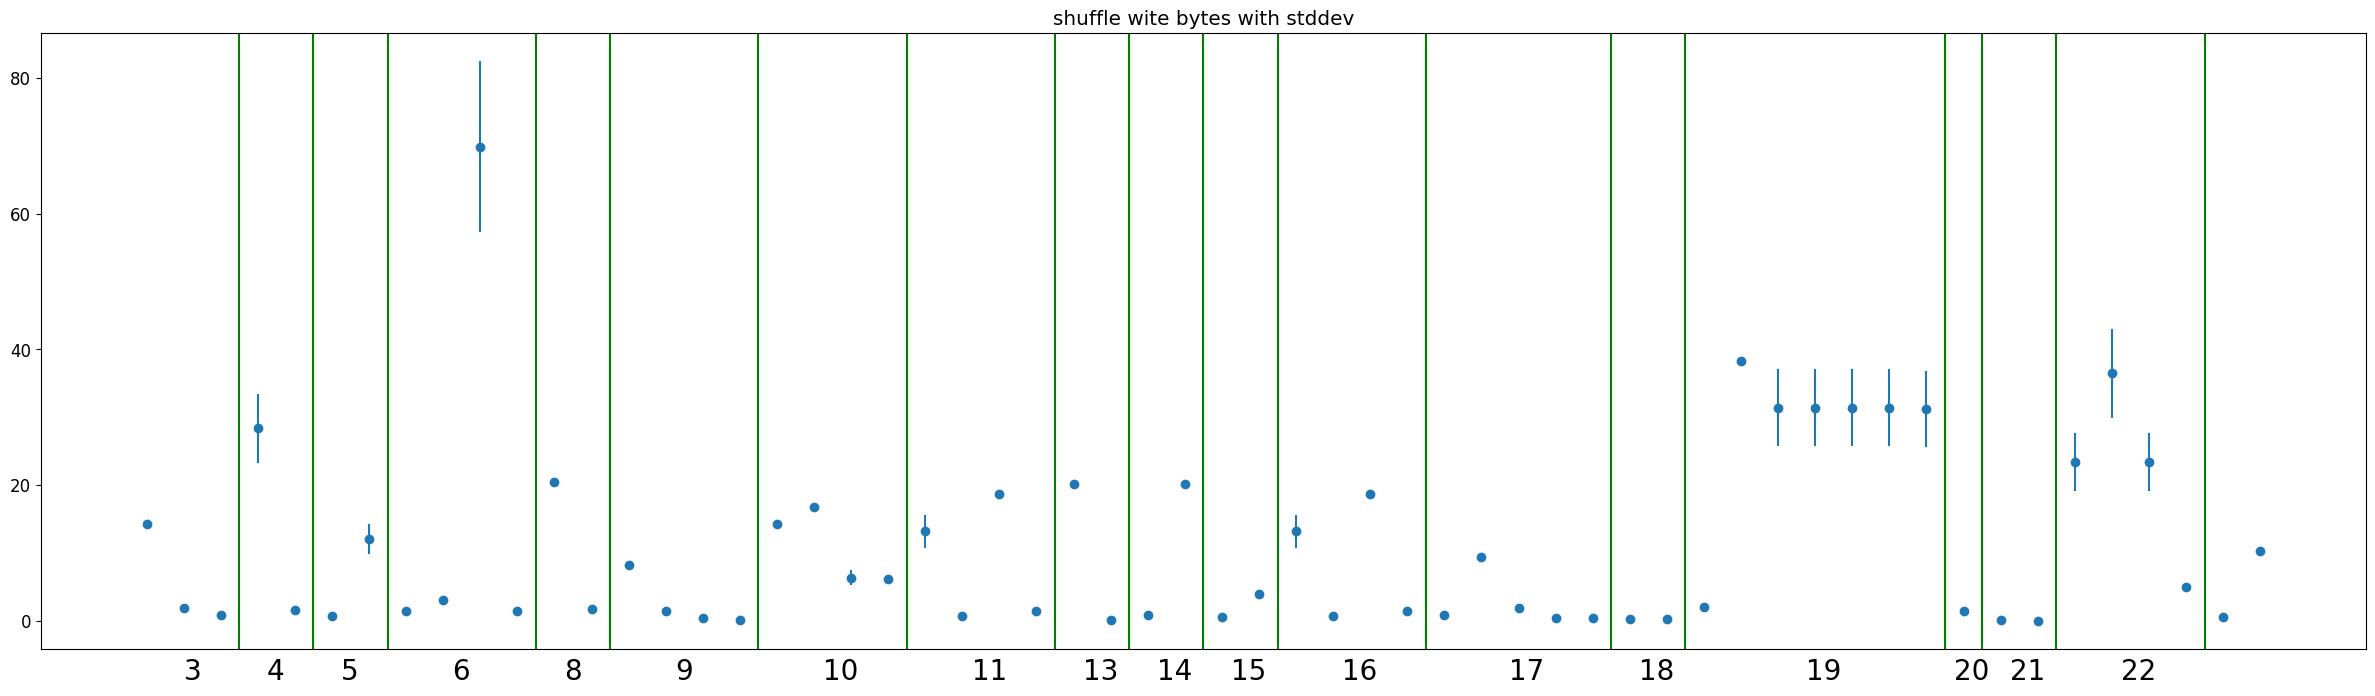

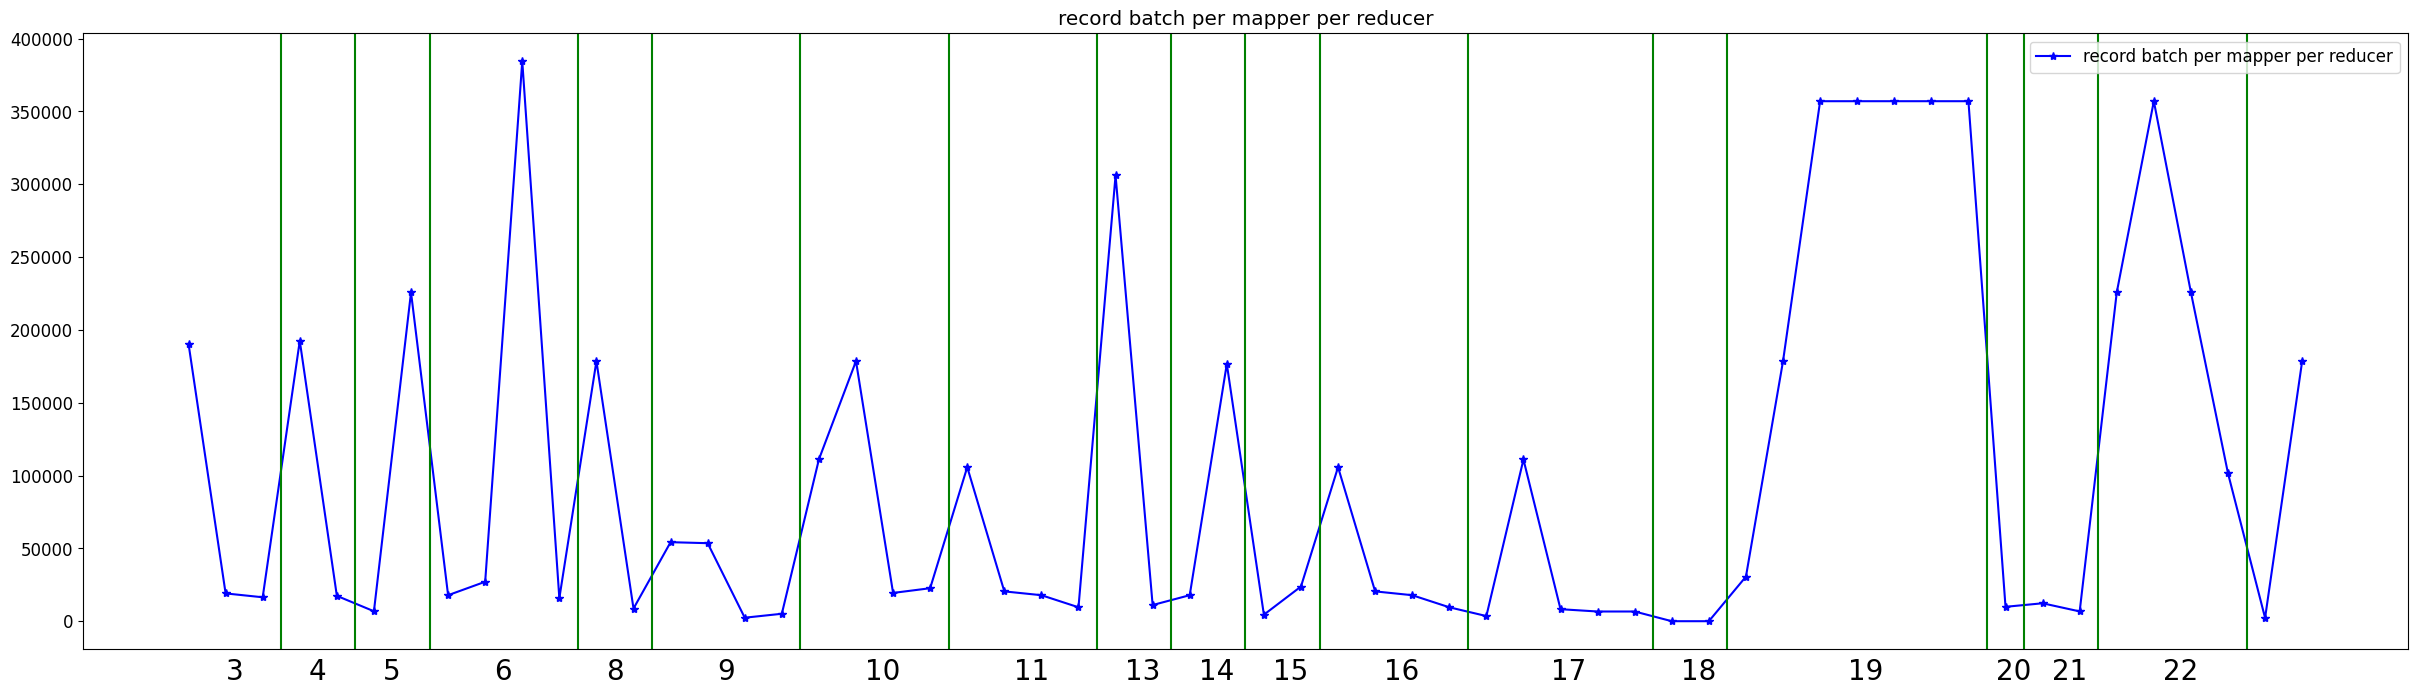

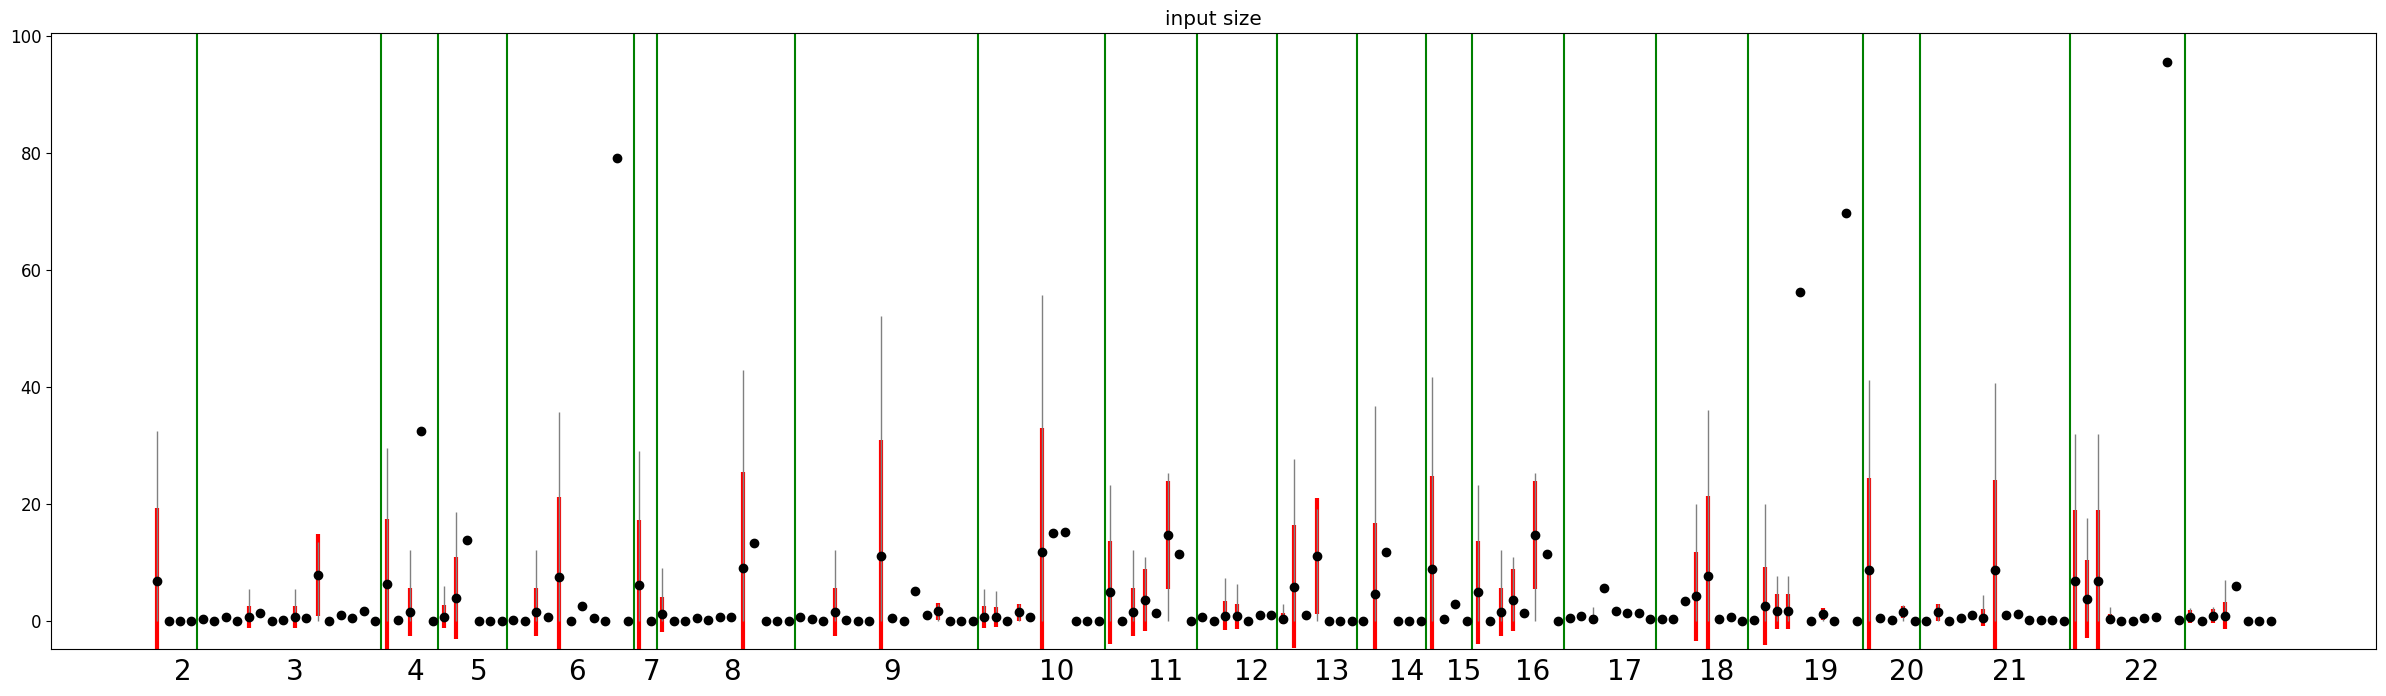

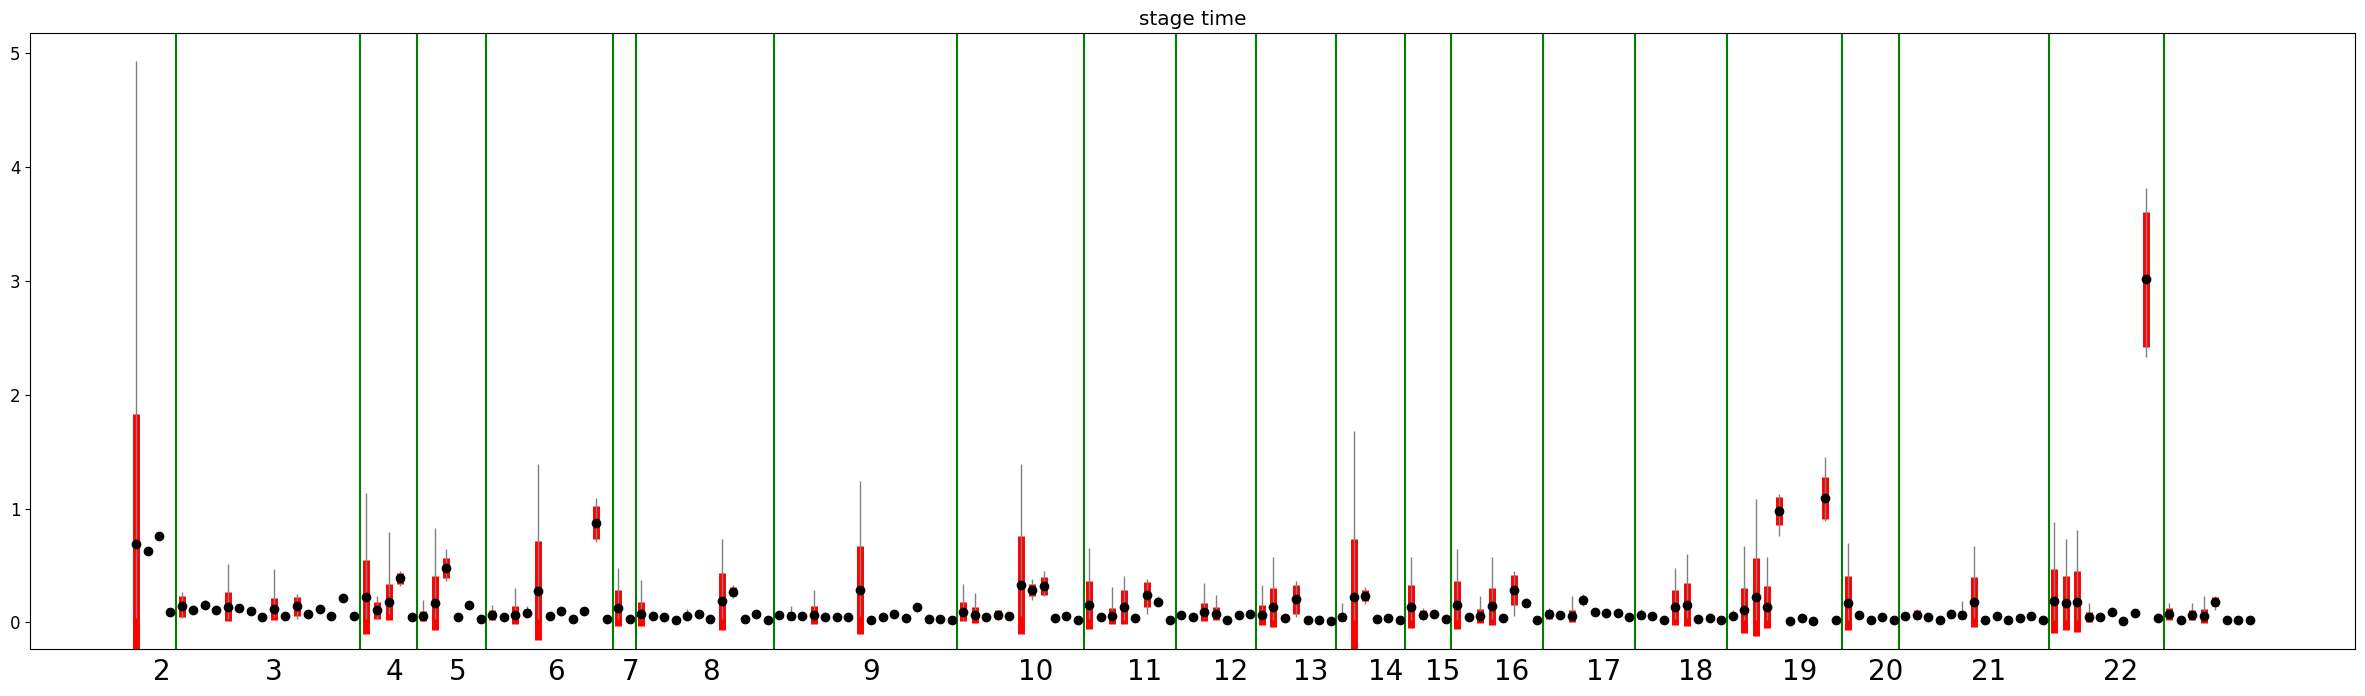

In [30]:
out=appals.get_shuffle_stat()

In [ ]:
sc.stop()